In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv("/content/data_banknote_authentication.csv")

data=np.array(data)

np.random.shuffle(data)

X=data[:,:2]
y=data[:,-1]
y[y==0]=-1

In [32]:
import pandas as pd
data = pd.DataFrame({'column_name': [1, 2, 3, 4]})

In [33]:
data.head()

,column_name
0,1
1,2
2,3
3,4


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   column_name  4 non-null      int64
dtypes: int64(1)
memory usage: 160.0 bytes


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [4]:
X_train=(X_train-np.mean(X_train,axis=0)/np.std(X_train,axis=0))
X_test=(X_test-np.mean(X_test,axis=0)/np.std(X_test,axis=0))

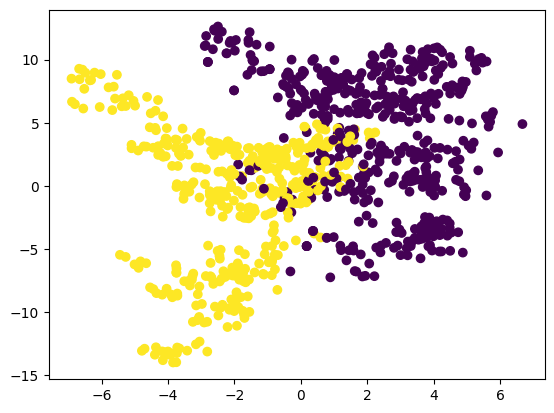

In [5]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)
plt.show()

In [6]:
def Perceptron(X,y,epochs,eta):
    W=np.random.randn(2)
    b=np.random.randn()

    for j in range(epochs):
        Error=0
        for i in range(len(y)):

            yhat= np.dot(W,X[i].T) + b
            yhat= 1 if yhat>0 else -1

            W= W - eta * (yhat-y[i]) * X[i]
            b=b - eta * (yhat-y[i])

            Error+= 1 if (yhat-y[i])!=0  else 0

        if j%100==0:
            print(Error)
    return W,b,Error

In [7]:
W1,b1,Error1= Perceptron(X_train,y_train,1500,0.001)

146
170
158
164
167
169
164
164
158
159
162
163
160
165
163


In [8]:
def Decision_Boundary(X,y,W,b,Error):
    dum_x=np.linspace(-2,5,100)
    plt.scatter(X[:,0],X[:,1],c=y)
    plt.plot(dum_x,((-dum_x * W[0])-b)/W[1])
    plt.title("Error: "+ str(Error))
    plt.show()

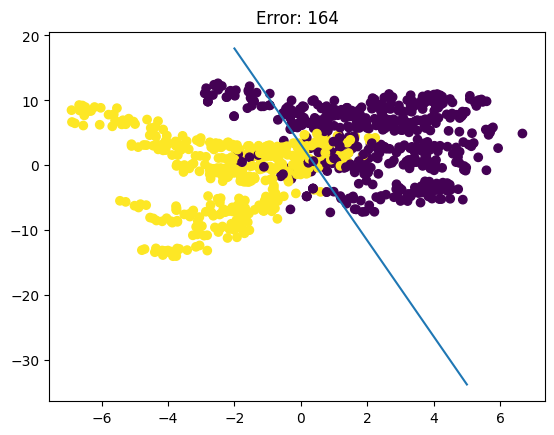

In [9]:
Decision_Boundary(X_train,y_train,W1,b1,Error1)

In [10]:
def Adaline(X,y,epochs,eta):
    W=np.random.randn(2)
    b=np.random.randn()

    for j in range(epochs):
        yhat= np.dot(W,X.T) + b

        Error= (1/(2*len(y))) * np.sum((yhat-y)**2)

        W= W - eta * np.mean((yhat-y) * X.T)
        b= b- eta * np.mean(yhat-y)

        if j%100==0:
            print(Error)
    return W,b,Error

In [11]:
W2,b2,Error2= Adaline(X_train,y_train,1500,0.001)

14.893975909029708
5.323521257279366
5.256449475565914
5.234352604994121
5.216167197861219
5.20108388659126
5.188573008373206
5.178195836990288
5.169588472731158
5.162449078308924
5.15652729422012
5.151615459305209
5.147541328626096
5.14416203329593
5.1413590704486545


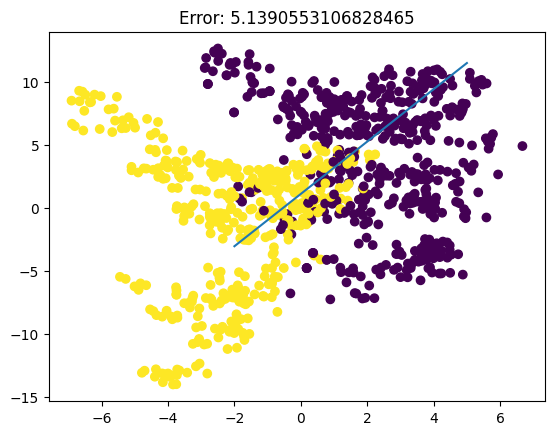

In [12]:
Decision_Boundary(X_train,y_train,W2,b2,Error2)

In [13]:
def Logistic_Regression(X,y,epochs,eta):
    W=np.random.randn(2)
    b=np.random.randn()

    for j in range(epochs):
        yhat= np.dot(W,X.T) + b

        Z=1/(1 + np.exp(-yhat))

        Error= np.sum((y * np.log(Z+1e-10) + (1-y) * np.log(1-Z+1e-10))) * -1/len(y)

        W= W - eta * np.mean((Z-y) * X.T)
        b= b- eta * np.mean(Z-y)

        if j%100==0:
            print(Error)
    return W,b,Error

In [14]:
W3,b3,Error3= Logistic_Regression(X_train,y_train,1500,0.01)

13.757908581972478
-2.416441354985398
-5.307805106579507
-5.441837371914941
-5.218070691403437
-4.935961045922668
-4.662544648210541
-4.468129193498523
-4.332488902497433
-4.235367169379085
-4.167366025857296
-4.114942422317446
-4.0692939721259425
-4.025339383243132
-3.9810362348350172


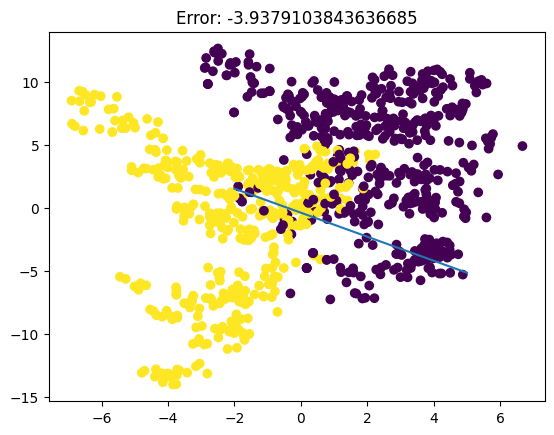

In [15]:
Decision_Boundary(X_train,y_train,W3,b3,Error3)

In [16]:
def test_model(W,b,X_test,y_test,arch):
    y_pred= np.dot(W,X_test.T) + b

    if arch=="Perceptron" or arch=="Adaline":
        y_pred[y_pred>0]=1
        y_pred[y_pred<0]=-1
    else:
        y_pred=1/(1 + np.exp(-y_pred))
        y_pred[y_pred<0.5]=-1
        y_pred[y_pred>0.5]=1

    print('\n',arch,(np.sum(y_pred==y_test)/len(y_test)) * 100)

In [17]:
test_model(W1,b1,X_test,y_test,"Perceptron")
test_model(W2,b2,X_test,y_test,"Adaline")
test_model(W3,b3,X_test,y_test,"Logistic_Regression")


 Perceptron 86.16504854368931

 Adaline 45.14563106796117

 Logistic_Regression 75.24271844660194


In [18]:
from sklearn.model_selection import train_test_split

def train_model(X, y):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    print("Train data shape:", X_train.shape, y_train.shape)
    print("Test data shape:", X_test.shape, y_test.shape)

    # ... the rest of the code ...

# Call the function with the data
train_model(X, y)

Train data shape: (959, 2) (959,)
Test data shape: (412, 2) (412,)


In [19]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC  # Import the Support Vector Classifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the SVM classifier
clf = SVC(kernel='linear', random_state=42)  # You can choose different kernels like 'rbf', 'poly', etc.

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Calculate accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the SVM model: {accuracy * 100:.2f}%')


Accuracy of the SVM model: 84.71%


In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Calculate accuracy, precision, and recall of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Accuracy of the SVM model: {accuracy :.2f}')
print(f'Precision of the SVM model: {precision :.2f}')
print(f'Recall of the SVM model: {recall :.2f}')



Accuracy of the SVM model: 0.85
Precision of the SVM model: 0.82
Recall of the SVM model: 0.82


In [25]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier  # Import the Decision Tree Classifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Calculate accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the Decision Tree model: {accuracy * 100:.2f}%')


Accuracy of the Decision Tree model: 93.20%


In [26]:
# Calculate accuracy, precision, and recall of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Accuracy of the Decision Tree model: {accuracy:.2f}')
print(f'Precision of the Decision Tree model: {precision :.2f}')
print(f'Recall of the Decision Tree model: {recall :.2f}')

Accuracy of the Decision Tree model: 0.93
Precision of the Decision Tree model: 0.92
Recall of the Decision Tree model: 0.92


In [27]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier  # Import the Random Forest Classifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators as needed

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Calculate accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the Random Forest model: {accuracy * 100:.2f}%')

Accuracy of the Random Forest model: 94.17%


In [28]:
# Calculate accuracy, precision, and recall of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Accuracy of the Random Forest model: {accuracy :.2f}')
print(f'Precision of the Random Forest model: {precision:.2f}')
print(f'Recall of the Random Forest model: {recall:.2f}')

Accuracy of the Random Forest model: 0.94
Precision of the Random Forest model: 0.92
Recall of the Random Forest model: 0.94


In [29]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier  # Import the KNN Classifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the KNN classifier
clf = KNeighborsClassifier(n_neighbors=5)  # You can choose different values for n_neighbors

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Calculate accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the KNN model: {accuracy * 100:.2f}%')

Accuracy of the KNN model: 92.96%


In [30]:
# Calculate precision, recall, and accuracy of the model
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

print(f'Precision of the KNN model: {precision:.2f}')
print(f'Recall of the KNN model: {recall:.2f}')
print(f'Accuracy of the KNN model: {accuracy:.2f}')

Precision of the KNN model: 0.93
Recall of the KNN model: 0.93
Accuracy of the KNN model: 0.93
